<a href="https://colab.research.google.com/github/secutron/TesTime/blob/main/AL21Test_DataHandling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!git clone https://github.com/tangsanli5201/DeepPCB

fatal: destination path 'DeepPCB' already exists and is not an empty directory.


In [31]:
'''
train과 test 리스트 준비
'''

import csv
train, test = [],[]
def take_path(x,d):
    with open(d) as t:
        #print(t.read())
        print(type(csv.reader(t)))
        tmp = csv.reader(t,delimiter=' ')
        for i in tmp:
            x.append(i)
        for ele in x:
            ele[0] = './DeepPCB/PCBData/'+ele[0][:-4]+'_test.jpg'
            ele[1] = './DeepPCB/PCBData/'+ele[1]

take_path(test,'./DeepPCB/PCBData/test.txt')
print(test[:2])
take_path(train,'./DeepPCB/PCBData/trainval.txt')
print(train[:2])

<class '_csv.reader'>
[['./DeepPCB/PCBData/group20085/20085/20085291_test.jpg', './DeepPCB/PCBData/group20085/20085_not/20085291.txt'], ['./DeepPCB/PCBData/group20085/20085/20085292_test.jpg', './DeepPCB/PCBData/group20085/20085_not/20085292.txt']]
<class '_csv.reader'>
[['./DeepPCB/PCBData/group20085/20085/20085000_test.jpg', './DeepPCB/PCBData/group20085/20085_not/20085000.txt'], ['./DeepPCB/PCBData/group20085/20085/20085001_test.jpg', './DeepPCB/PCBData/group20085/20085_not/20085001.txt']]


In [32]:


import numpy as np
import cv2

height, width = cv2.imread(test[0][0]).shape[:2]
print(height, width)

640 640


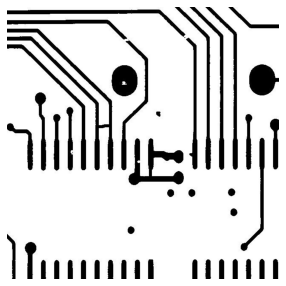

In [33]:

import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from matplotlib.pyplot import imshow
from PIL import Image
import IPython
def cv2_imshow(img):
    img = img[:,:,[2,1,0]]
    img = Image.fromarray(img)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

im = cv2.imread(test[0][0])
cv2_imshow(im)

In [40]:
import os
import numpy as np
import json

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

def get_PCB_dict(data_list):
    dataset_dicts = []
    
    for i,path in enumerate(data_list):
        filename = path[0]
        height, width = cv2.imread(filename).shape[:2]
        record = {}
        record['file_name'] = filename
        record['image_id'] = i
        record['height']= height
        record['width']= width
        
        
        objs = []
        with open(path[1]) as t:
            lines = t.readlines()
            for line in lines:
                if line[-1]=="\n":
                  box = line[:-1].split(' ')
                else:
                  box = line.split(' ')


                boxes = list(map(int,[box[0],box[1],box[2],box[3]]))
                category = int(box[4])

                obj = {
                    "bbox": boxes,
                    "bbox_mode": 0, #BoxMode.XYXY_ABS,
                          #"segmentation": [poly], To draw a line, along to ballon
                          #you will need this for mask RCNN
                    "category_id": category-1,
                    "iscrowd": 0
                }
                objs.append(obj)
            record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts #list of dicts


train_dic = get_PCB_dict(train)
print(train_dic[0])
print(train_dic[1])
print('\n')

test_dic = get_PCB_dict(train)
print(test_dic[0])
print(test_dic[1])
print('\n')


{'file_name': './DeepPCB/PCBData/group20085/20085/20085000_test.jpg', 'image_id': 0, 'height': 640, 'width': 640, 'annotations': [{'bbox': [409, 394, 435, 422], 'bbox_mode': 0, 'category_id': 2, 'iscrowd': 0}, {'bbox': [275, 383, 319, 417], 'bbox_mode': 0, 'category_id': 2, 'iscrowd': 0}, {'bbox': [8, 163, 36, 191], 'bbox_mode': 0, 'category_id': 3, 'iscrowd': 0}, {'bbox': [244, 151, 270, 182], 'bbox_mode': 0, 'category_id': 4, 'iscrowd': 0}, {'bbox': [338, 519, 364, 543], 'bbox_mode': 0, 'category_id': 5, 'iscrowd': 0}, {'bbox': [476, 460, 502, 481], 'bbox_mode': 0, 'category_id': 3, 'iscrowd': 0}]}
{'file_name': './DeepPCB/PCBData/group20085/20085/20085001_test.jpg', 'image_id': 1, 'height': 640, 'width': 640, 'annotations': [{'bbox': [335, 208, 364, 233], 'bbox_mode': 0, 'category_id': 2, 'iscrowd': 0}, {'bbox': [429, 132, 458, 159], 'bbox_mode': 0, 'category_id': 3, 'iscrowd': 0}, {'bbox': [71, 149, 96, 172], 'bbox_mode': 0, 'category_id': 4, 'iscrowd': 0}, {'bbox': [323, 26, 350, 

In [35]:
!pip install bbox-visualizer

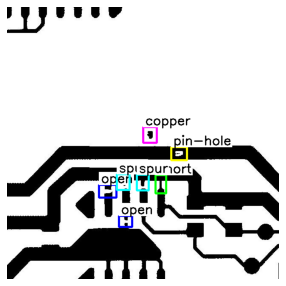

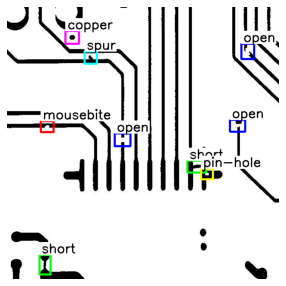

'\nlabels = []\nbboxes = []\nfor d in random.sample(test_dic, 2):\n    img = cv2.imread(d["file_name"])\n\n    for ann in d[\'annotations\']:\n        labels.append(defect_classes[ann[\'category_id\']])\n        bboxes.append(ann[\'bbox\'])\n\n    img_with_boxes = bbv.draw_multiple_rectangles(img, bboxes)\n    img_with_boxes = bbv.add_multiple_labels(img_with_boxes, labels, bboxes)\n\n    cv2_imshow(img_with_boxes)\n'

In [46]:
import bbox_visualizer as bbv
import random

defect_classes=["open", "short", "mousebite", "spur", "copper", "pin-hole"]
defect_colors=[(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255),(0,255,255)]


for d in random.sample(test_dic, 2):
    img = cv2.imread(d["file_name"])
    img_with_box = img.copy()

    for ann in d['annotations']:
        category = ann['category_id']
        label = defect_classes[category]
        img_with_box = bbv.draw_rectangle(img_with_box, ann['bbox'], defect_colors[category])
        img_with_box = bbv.add_label(img_with_box, label, ann['bbox'])

    cv2_imshow(img_with_box)

'''
labels = []
bboxes = []
for d in random.sample(test_dic, 2):
    img = cv2.imread(d["file_name"])

    for ann in d['annotations']:
        labels.append(defect_classes[ann['category_id']])
        bboxes.append(ann['bbox'])

    img_with_boxes = bbv.draw_multiple_rectangles(img, bboxes)
    img_with_boxes = bbv.add_multiple_labels(img_with_boxes, labels, bboxes)

    cv2_imshow(img_with_boxes)
'''